## Step 1: Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Bike_Sharing data

In [3]:
bike_sharing_data = pd.read_csv("day.csv")

In [4]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing_data.shape

(730, 16)

In [7]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking for null values
bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**From above visualization , we can derive that the Bike Sharing data having following insights:**
  1. There are 16 columns
  2. Each Column have 730 entries
  3. Non of the coulums have the null values , so non of the row will also not have any null values either
  4. Some of columns have the categorical data which will need to be transfromed
  5. Data type is int64, 

### Highlights from the column's definition txt file
- yr column 0 is year 2018 and 1 is year 2019
- season (1:spring, 2:summer, 3:fall, 4:winter)
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- casual: count of casual users
	- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
-  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

## Step 3: Cleaning the data and Transforming the data

In [9]:
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Droping columns which are no use to bulid the model and also creating the columns which will be handy(derived info)

In [10]:
#let us introduce a days_old variable which indicates how old is the business
bike_sharing_data['days_old'] = (pd.to_datetime(bike_sharing_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [11]:
# Drop the 'dteday' column as the year , month, day are already present in other columns
bike_sharing_data.drop(["dteday"], axis=1, inplace= True)

# Drop the 'instant' columns as it cotains the serial number ,so no use
bike_sharing_data.drop(["instant"], axis=1, inplace= True)

#Drop the column 'casual' , it contains the info (qty) of casual user, so no use
bike_sharing_data.drop(["casual"], axis=1, inplace= True)

#Drop the column 'registered', as it contains the count of registered users , so no use
bike_sharing_data.drop(["registered"], axis=1, inplace= True)

In [12]:
# Checking the data after columns droped
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
bike_sharing_data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,725
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,726
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,727
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,728
729,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729,729


In [14]:
# checking unique values all columns contains
bike_sharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

In [15]:
# checking the unique value count in 'season' column
bike_sharing_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
# checking the unique value count in 'wearthersit' column
bike_sharing_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
# checking the unique value count in 'holiday' column
bike_sharing_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# checking the unique value count in 'workingday' column
bike_sharing_data.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

## Step 4: Visualising the Data

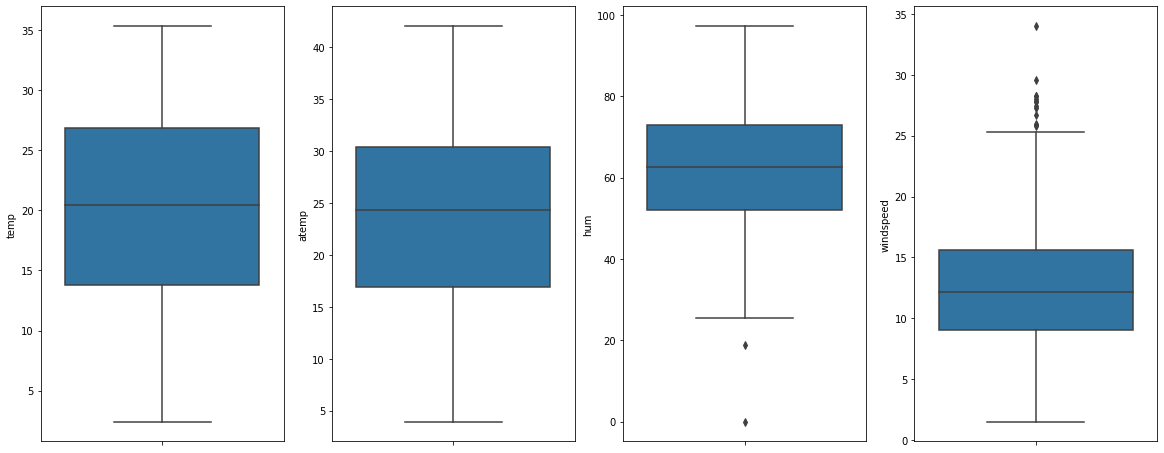

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(1,4,1)
sns.boxplot(y = 'temp', data = bike_sharing_data)
plt.subplot(1,4,2)
sns.boxplot(y = 'atemp', data = bike_sharing_data)
plt.subplot(1,4,3)
sns.boxplot(y = 'hum', data = bike_sharing_data)
plt.subplot(1,4,4)
sns.boxplot(y = 'windspeed', data = bike_sharing_data)
plt.show()

- From above box plots ,we can say that there no such outliers which we will needed to handled.
-  so we are good to go.

- Making transfromation:
    1. 'season' column data to be converted in categorical type
    2. 'weathersit' column data to converted in categorical type as well as per given description in        text file(defination)    

In [20]:
bike_sharing_data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace= True)
bike_sharing_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace= True)
bike_sharing_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace= True)
bike_sharing_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace= True)
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


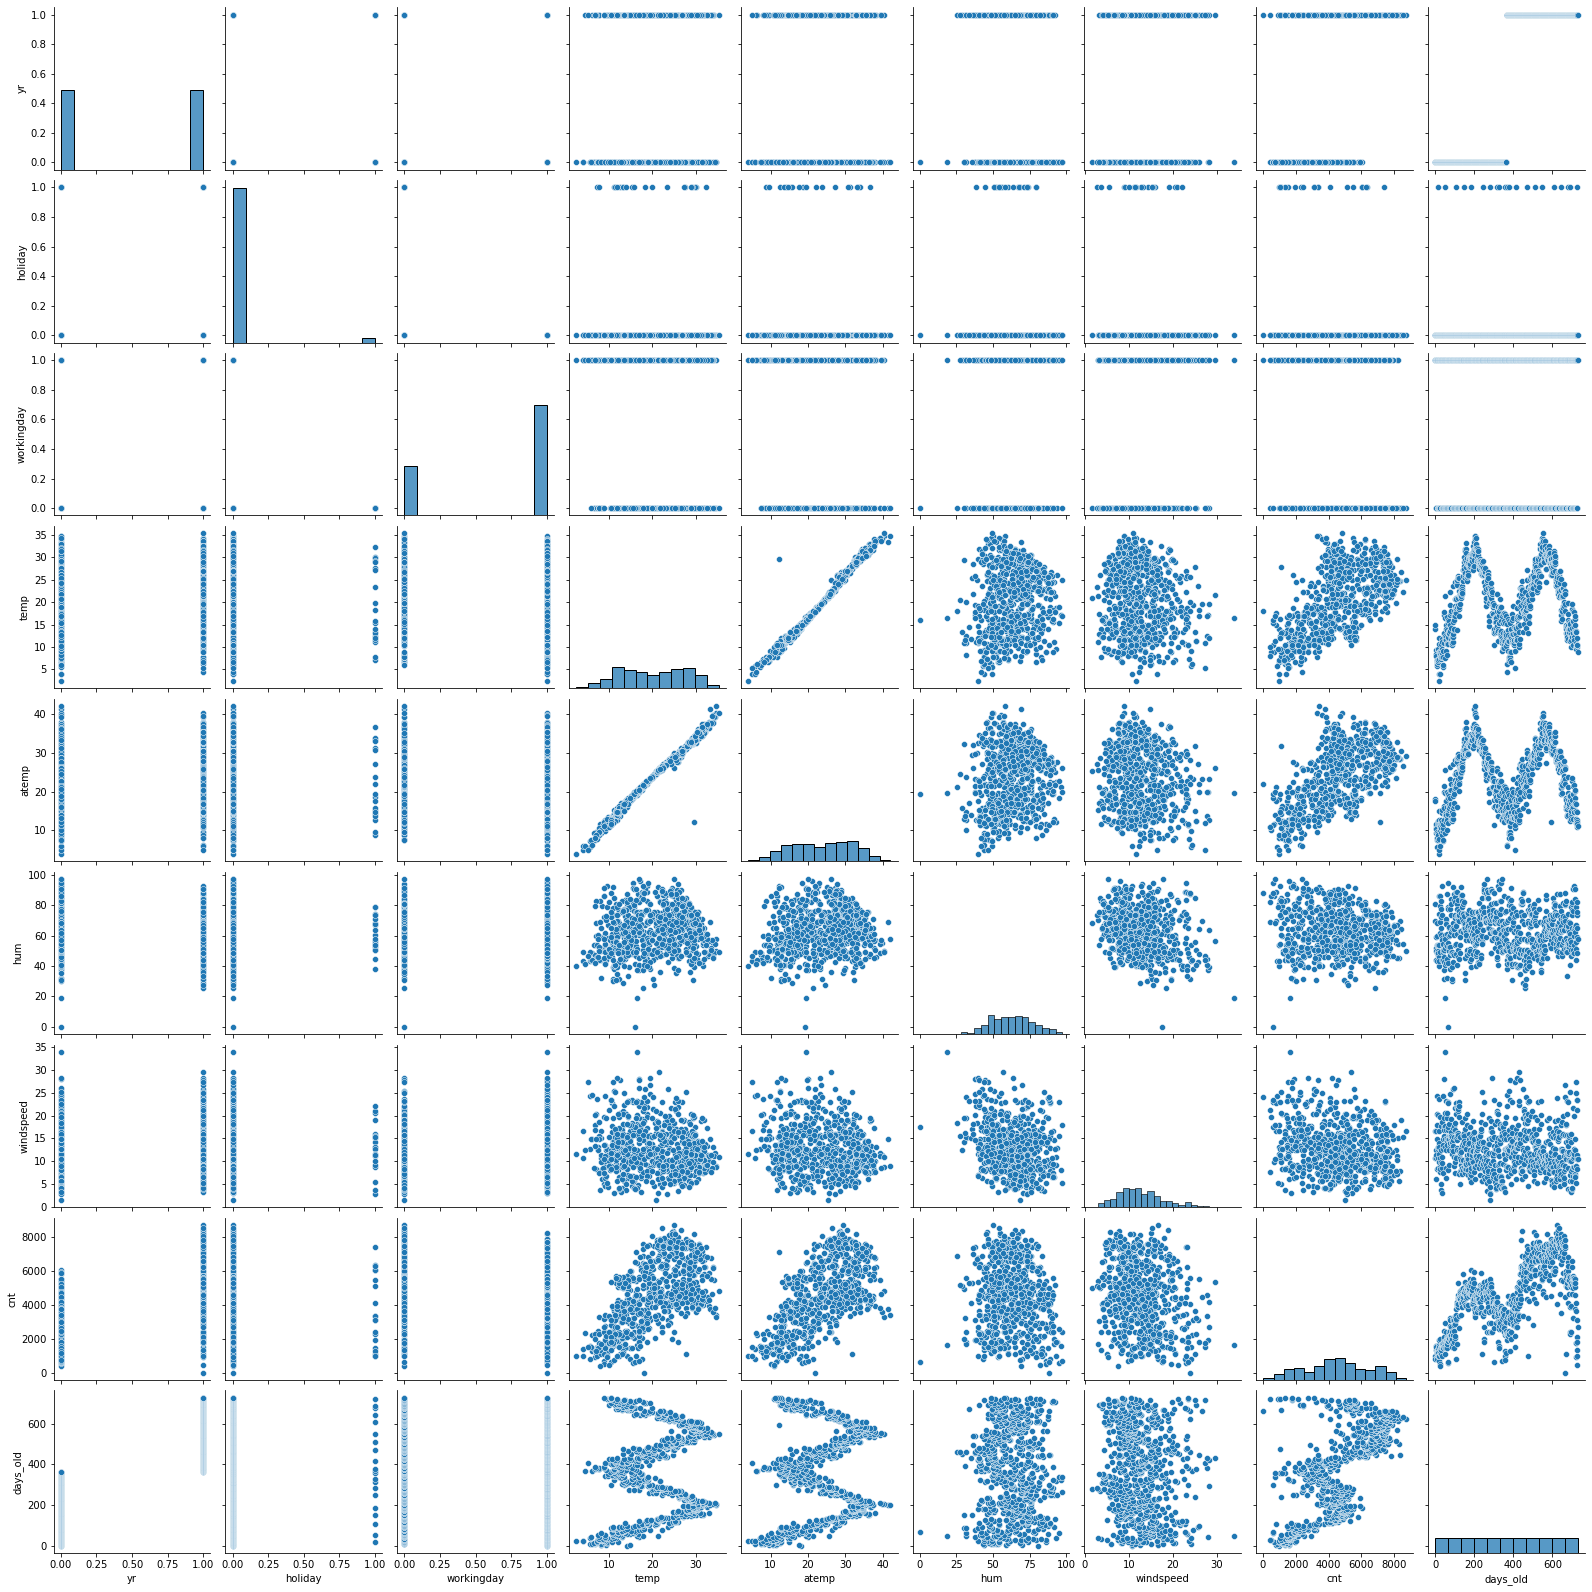

In [21]:
#pair plot
sns.pairplot(bike_sharing_data)
plt.show()

<Figure size 1080x2160 with 0 Axes>

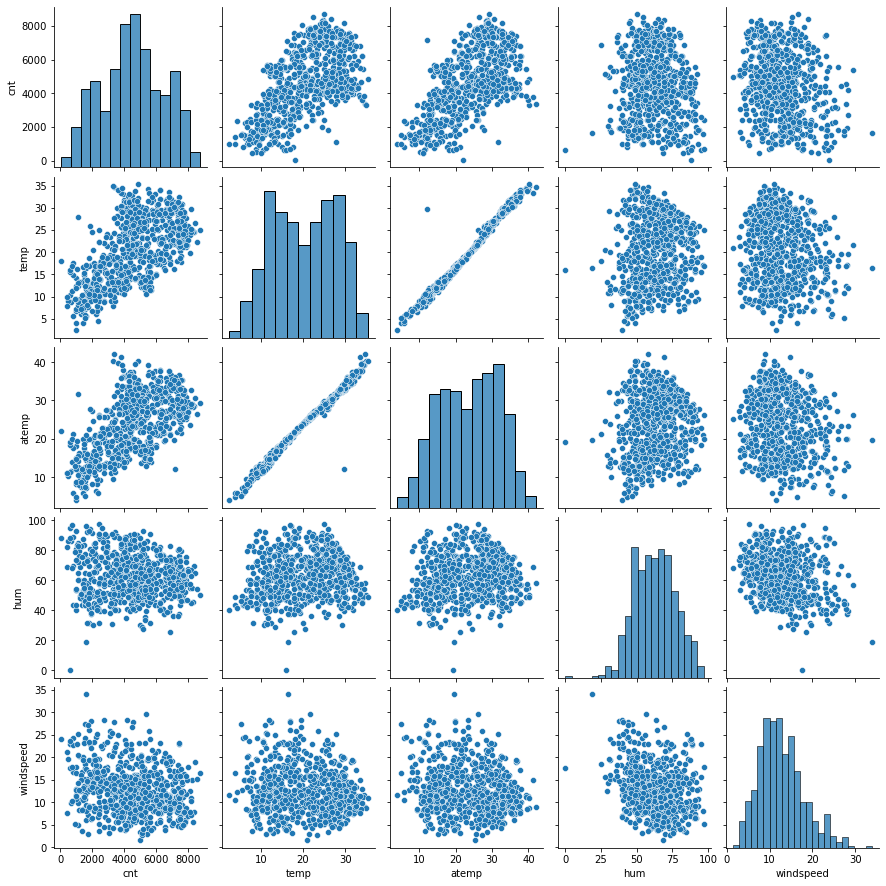

In [22]:
# pair plot of numeric continous data variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing_data,vars=['cnt', 'temp',"atemp",'hum','windspeed'])
plt.show()

In [23]:
# Checking the correlation between variables
bike_sharing_data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.112667
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.629896
days_old,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.629896,1.000000


In [24]:
# from above we can see that "temp" and "atemp" has almost same correlation
# Drop atemp as the info related to temp already present in temp column, so avoid the repeated info
bike_sharing_data.drop(["atemp"], axis=1, inplace= True)

In [25]:
bike_sharing_data.shape

(730, 12)

In [26]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600,4


In [27]:
# correlation between the numerical variables
bike_sharing_data[['temp','hum','windspeed','cnt']].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


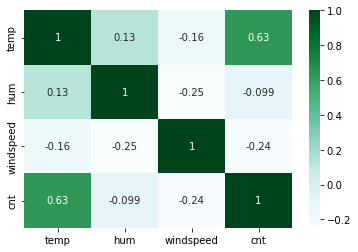

In [28]:
# checking the correlation between all continous numerical variables

sns.heatmap(bike_sharing_data[['temp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

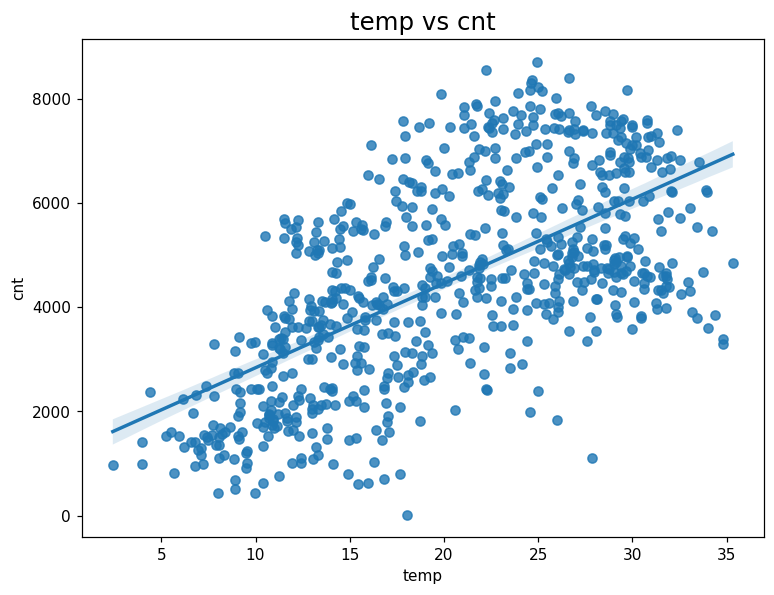

In [29]:
# visualizing the correlation between "temp" and "cnt" through regplot
plt.figure(figsize=(8,6),dpi=110)
plt.title("temp vs cnt",fontsize=16)
sns.regplot(x = "temp", y = "cnt", data = bike_sharing_data)
plt.show()

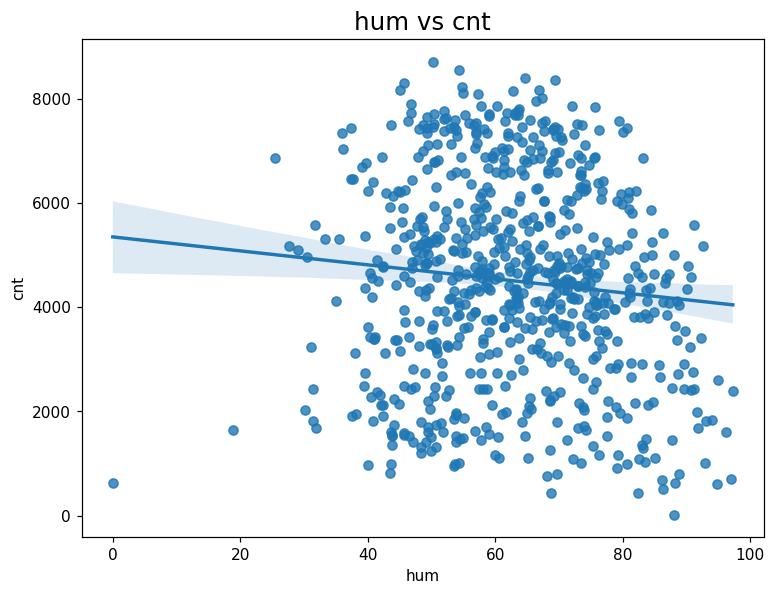

In [30]:
# visualizing the correlation between "temp" and "cnt" through regplot
plt.figure(figsize=(8,6),dpi=110)
plt.title("hum vs cnt",fontsize=16)
sns.regplot(x = "hum", y = "cnt", data = bike_sharing_data)
plt.show()

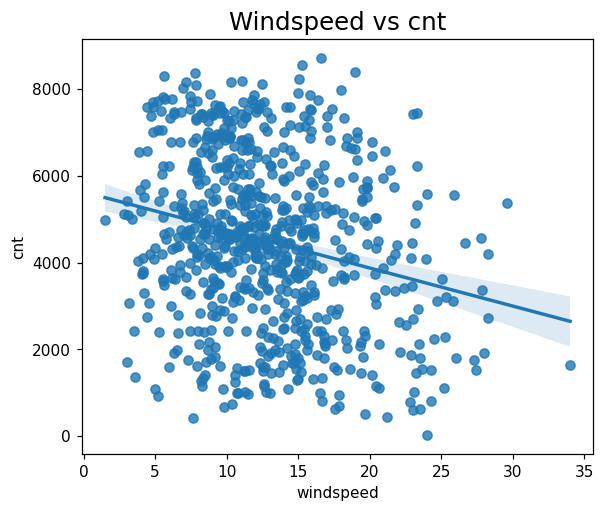

In [31]:
# visualizing the correlation between "temp" and "cnt" through regplot
plt.figure(figsize=(6,5),dpi=110)
plt.title("Windspeed vs cnt",fontsize=16)
sns.regplot(x = "windspeed", y = "cnt", data = bike_sharing_data)
plt.show()

**Visualising Categorical Variables**

In [32]:
bike_sharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [33]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600,4


In [34]:
bike_sharing_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing_data.mnth = bike_sharing_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing_data.weekday = bike_sharing_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600,4


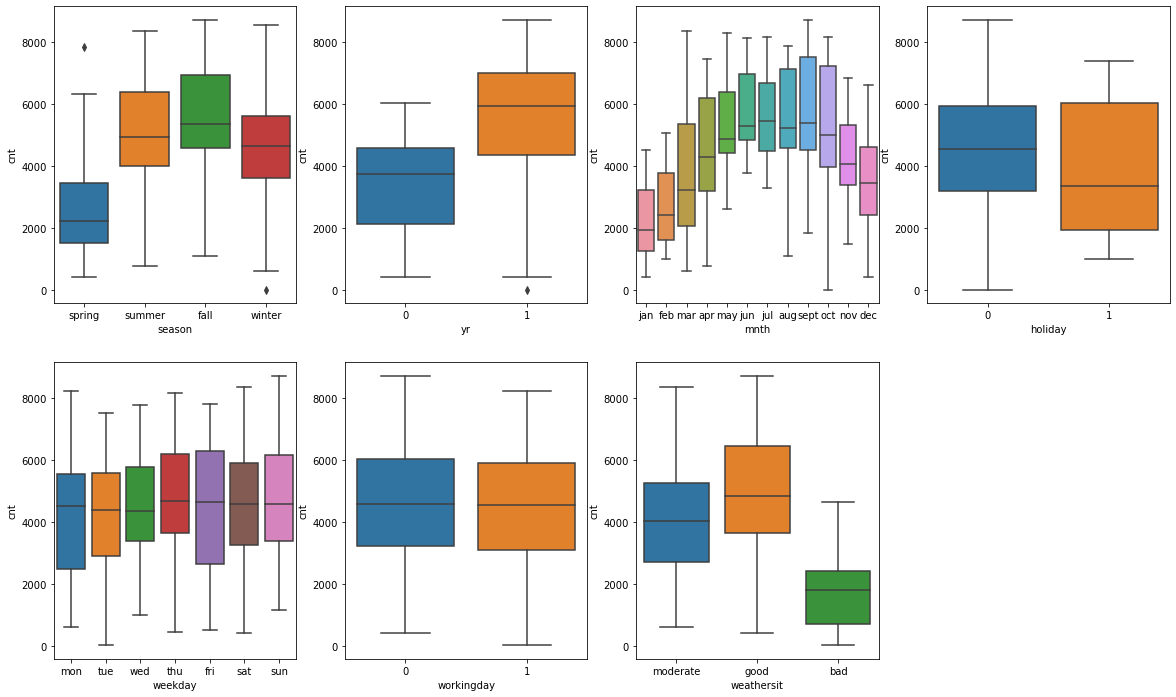

In [35]:
# Box plot of Categorical Variables

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data)

plt.show()

## Step 5: Data Preparation

In [36]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600,4


### Creating the dummy variables for all categorical variables
- Season, mnth, weekday will need (p-1) dummy variables to expalain the p situations
- whereas weathersit will need p dummy variables as we can not miss out the valuable information

In [37]:
bike_sharing_data = pd.get_dummies(data= bike_sharing_data, columns= ["season", "mnth", "weekday"], drop_first= True)
bike_sharing_data = pd.get_dummies(data= bike_sharing_data, columns= ["weathersit"])

In [38]:
# checking the data frame after dummy variables creation
bike_sharing_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# checking the column list present in the data frame after creation of dummy variable
bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
bike_sharing_data.shape

(730, 31)

## Step 4: Model Building
### Splitting the Data into Training and Testing Sets

In [41]:
np.random.seed(0) # we use this so that the number of rows and colums are same in train and test data
df_train, df_test = train_test_split(bike_sharing_data, train_size=0.7, test_size=0.3, random_state= 150)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'cateogerical' and 'dummy' variables
num_vars = ['temp','hum','windspeed','days_old', "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
726,1,0,0,0.204943,0.612987,0.274350,0.321623,0.995879,1,0,...,0,0,1,0,0,0,0,0,0,1
589,1,0,1,0.815938,0.566667,0.234647,0.778945,0.807692,0,0,...,0,0,0,0,0,1,0,0,1,0
60,0,0,1,0.311677,0.467099,0.588452,0.205602,0.081044,1,0,...,0,0,0,0,0,0,0,0,1,0
261,0,0,1,0.591581,0.716883,0.266662,0.495956,0.357143,0,0,...,1,0,0,0,0,0,1,0,0,1
608,1,0,0,0.858414,0.663203,0.187179,0.689243,0.833791,0,0,...,1,0,0,1,0,0,0,0,0,1


In [46]:
df_train.workingday.value_counts()

1    356
0    154
Name: workingday, dtype: int64

In [47]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.033333,0.698039,0.523083,0.649428,0.340972,0.489320,0.491451,0.258824,0.250980,...,0.078431,0.131373,0.135294,0.135294,0.147059,0.145098,0.156863,0.023529,0.623529,0.352941
std,0.500456,0.179682,0.459559,0.243284,0.145042,0.158926,0.232820,0.288191,0.438419,0.434003,...,0.269113,0.338139,0.342373,0.342373,0.354512,0.352545,0.364028,0.151726,0.484976,0.478354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.306776,0.545021,0.229511,0.335084,0.246223,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.535491,0.646584,0.323711,0.496620,0.492445,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730987,0.751083,0.429488,0.652753,0.734547,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


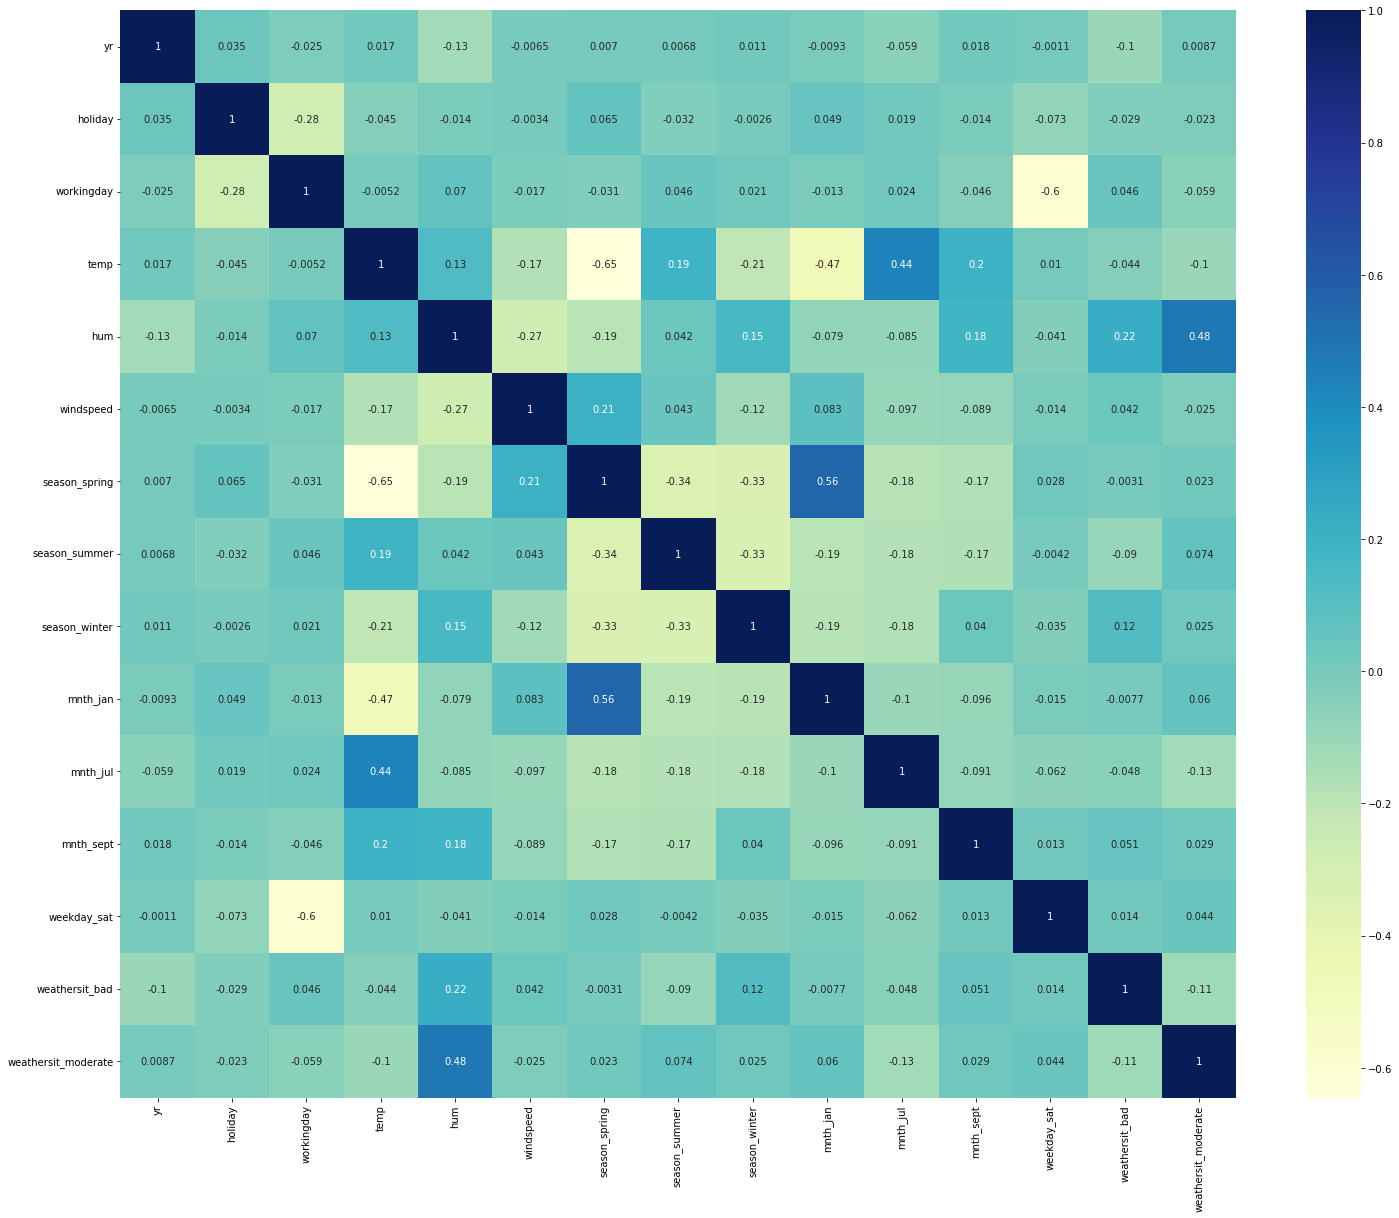

In [48]:
# Let's check the correlation coefficients to which variables have a good correlation
plt.figure(figsize= (25,20))
sns.heatmap(df_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), annot= True, cmap = "YlGnBu")
plt.show()

In [49]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop("cnt")

X_train = df_train

## Building the Model

**RFE**
- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [50]:
# Here we import RFE and linear Regression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

#Cuting down the number of features to 15 using automated approach
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 15),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 16),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [55]:
# Creating dataframe from selected col by RFE
X_train_rfe = X_train[col]

## Model 1

In [56]:
# Checking for VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,46.26
14,weathersit_moderate,31.83
5,days_old,16.81
0,yr,13.43
7,season_winter,4.44
6,season_spring,4.27
12,weathersit_bad,3.55
2,temp,3.21
9,mnth_jan,2.98
8,mnth_feb,2.48


In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [58]:
# Check the parameters obtained

lr1.params

const                  0.235451
yr                     0.340522
holiday               -0.070679
temp                   0.387644
hum                   -0.156079
windspeed             -0.147617
days_old              -0.201548
season_spring         -0.123293
season_winter          0.064163
mnth_feb              -0.058450
mnth_jan              -0.088929
mnth_oct               0.070441
mnth_sept              0.101760
weathersit_bad        -0.063994
weathersit_good        0.176007
weathersit_moderate    0.123437
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.72e-184
Time:                        18:06:52   Log-Likelihood:                 481.60
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     495   BIC:                            -869.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2355    

## Model 2

In [60]:
X_train_rfe_2 = X_train_rfe.drop(["days_old"], axis = 1)

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_good,42.66
13,weathersit_moderate,30.04
5,season_spring,4.20
11,weathersit_bad,3.39
2,temp,3.13
6,season_winter,2.60
8,mnth_jan,2.23
7,mnth_feb,2.02
3,hum,1.81
9,mnth_oct,1.58


In [62]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe_2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
# Check the parameters obtained

lr2.params

const                  0.209730
yr                     0.240859
holiday               -0.075489
temp                   0.370784
hum                   -0.162248
windspeed             -0.139814
season_spring         -0.132092
season_winter          0.019263
mnth_feb              -0.024237
mnth_jan              -0.047472
mnth_oct               0.079330
mnth_sept              0.090733
weathersit_bad        -0.075259
weathersit_good        0.167733
weathersit_moderate    0.117256
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.54e-183
Time:                        18:06:52   Log-Likelihood:                 475.90
No. Observations:                 510   AIC:                            -923.8
Df Residuals:                     496   BIC:                            -864.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2097    

## Model 3

In [65]:
X_train_rfe_3 = X_train_rfe_2.drop(["mnth_feb"], axis = 1)

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_good,42.20
12,weathersit_moderate,29.84
10,weathersit_bad,3.38
5,season_spring,3.10
2,temp,3.09
6,season_winter,2.59
3,hum,1.80
8,mnth_oct,1.58
7,mnth_jan,1.53
4,windspeed,1.16


In [67]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
# Check the parameters obtained
lr3.params

const                  0.207366
yr                     0.241033
holiday               -0.075204
temp                   0.374746
hum                   -0.160682
windspeed             -0.139643
season_spring         -0.143551
season_winter          0.020447
mnth_jan              -0.034044
mnth_oct               0.078528
mnth_sept              0.090100
weathersit_bad        -0.074708
weathersit_good        0.165999
weathersit_moderate    0.116075
dtype: float64

In [69]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.33e-184
Time:                        18:06:52   Log-Likelihood:                 475.25
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     497   BIC:                            -869.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2074    

## Model 4

In [70]:
X_train_rfe_4 = X_train_rfe_3.drop(["season_winter"], axis = 1)

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_good,42.20
12,weathersit_moderate,29.84
10,weathersit_bad,3.38
5,season_spring,3.10
2,temp,3.09
6,season_winter,2.59
3,hum,1.80
8,mnth_oct,1.58
7,mnth_jan,1.53
4,windspeed,1.16


In [72]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [73]:
# Check the parameters obtained
lr4.params

const                  0.220698
yr                     0.241725
holiday               -0.075102
temp                   0.350394
hum                   -0.156387
windspeed             -0.142529
season_spring         -0.155409
mnth_jan              -0.037060
mnth_oct               0.091251
mnth_sept              0.092901
weathersit_bad        -0.069218
weathersit_good        0.170761
weathersit_moderate    0.119155
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.22e-184
Time:                        18:06:52   Log-Likelihood:                 474.42
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     498   BIC:                            -874.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2207    

## Model 5

In [75]:
X_train_rfe_5 = X_train_rfe_4.drop(["mnth_jan"], axis = 1)

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_good,35.06
10,weathersit_moderate,26.46
8,weathersit_bad,3.10
5,season_spring,1.90
2,temp,1.85
3,hum,1.79
4,windspeed,1.15
6,mnth_oct,1.13
7,mnth_sept,1.09
0,yr,1.03


In [77]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [78]:
# Check the parameters obtained
lr5.params

const                  0.216567
yr                     0.241943
holiday               -0.075917
temp                   0.359022
hum                   -0.157317
windspeed             -0.139881
season_spring         -0.166476
mnth_oct               0.092471
mnth_sept              0.092509
weathersit_bad        -0.069929
weathersit_good        0.169333
weathersit_moderate    0.117162
dtype: float64

In [79]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.79e-185
Time:                        18:06:53   Log-Likelihood:                 472.17
No. Observations:                 510   AIC:                            -922.3
Df Residuals:                     499   BIC:                            -875.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2166    

## Model 6

In [80]:
X_train_rfe_6 = X_train_rfe_5.drop(["weathersit_bad"], axis = 1)

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_6.values, i) for i in range(X_train_rfe_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.92
8,weathersit_good,13.13
2,temp,9.94
9,weathersit_moderate,9.53
4,windspeed,5.28
5,season_spring,2.39
0,yr,2.01
6,mnth_oct,1.22
7,mnth_sept,1.18
1,holiday,1.04


In [82]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe_6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [83]:
# Check the parameters obtained
lr6.params

const                  0.146638
yr                     0.241943
holiday               -0.075917
temp                   0.359022
hum                   -0.157317
windspeed             -0.139881
season_spring         -0.166476
mnth_oct               0.092471
mnth_sept              0.092509
weathersit_good        0.239262
weathersit_moderate    0.187091
dtype: float64

In [84]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.79e-185
Time:                        18:06:53   Log-Likelihood:                 472.17
No. Observations:                 510   AIC:                            -922.3
Df Residuals:                     499   BIC:                            -875.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1466    

## Model 7

In [85]:
X_train_rfe_7 = X_train_rfe_6.drop(["hum"], axis = 1)

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_7.values, i) for i in range(X_train_rfe_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,weathersit_good,9.64
2,temp,8.53
8,weathersit_moderate,5.42
3,windspeed,5.27
4,season_spring,2.30
0,yr,2.00
5,mnth_oct,1.15
6,mnth_sept,1.15
1,holiday,1.04


In [87]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe_7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [88]:
# Check the parameters obtained
lr7.params

const                  0.005014
yr                     0.247025
holiday               -0.078110
temp                   0.349707
windspeed             -0.106840
season_spring         -0.163302
mnth_oct               0.087084
mnth_sept              0.083397
weathersit_good        0.279895
weathersit_moderate    0.203156
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          9.30e-183
Time:                        18:06:53   Log-Likelihood:                 464.24
No. Observations:                 510   AIC:                            -908.5
Df Residuals:                     500   BIC:                            -866.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0050    

## Model 8

In [90]:
X_train_rfe_8 = X_train_rfe_7.drop(["weathersit_good"], axis = 1)

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_8.values, i) for i in range(X_train_rfe_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.38
2,temp,3.81
0,yr,1.91
4,season_spring,1.77
7,weathersit_moderate,1.48
6,mnth_sept,1.15
5,mnth_oct,1.13
1,holiday,1.04


In [92]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe_8)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [93]:
# Check the parameters obtained
lr8.params

const                  0.270630
yr                     0.255334
holiday               -0.070488
temp                   0.361580
windspeed             -0.119192
season_spring         -0.162477
mnth_oct               0.065146
mnth_sept              0.069823
weathersit_moderate   -0.064941
dtype: float64

In [94]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     240.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.18e-166
Time:                        18:06:53   Log-Likelihood:                 422.16
No. Observations:                 510   AIC:                            -826.3
Df Residuals:                     501   BIC:                            -788.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2706    

In [95]:
X_train_rfe_8.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_moderate'],
      dtype='object')

## Final Model Interpretation

### Hypothesis Testing
- Hypothesis testing states that:
  - H0 : B1 = B2 =...= Bn = 0
  - H1 : at least one Bi! = 0
- lr6 model coefficient values
    - const                 0.2706   
    - yr                    0.2553     
    - holiday              -0.0705    
    - temp                  0.3616                       
    - windspeed            -0.1192    
    - season_spring        -0.1625    
    - mnth_oct              0.0651  
    - mnth_sept             0.0698            
    - weathersit_moderate  -0.0649

#### From the lr8 model summary, it is evident that all our coefficients are not equal to zero. 
- which means We REJECT the NULL HYPOTHESIS

### F Statistics
 - F- Statistics: 240.3
 - Prob (F-statistic): 4.18e-166.
 
**The F-Statistics value of 240.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

## The equation of best fitted surface based on model lr8:

cnt = 0.2706 + (yr x 0.2553) - (holiday x 0.0705) + (temp x 0.3616) 
      - (windspeed x 0.1192) - (season_spring x 0.1625) + (mnth_oct x 0.0651 ) + (mnth_sept x 0.0698)
       - (weathersit_moderate x 0.0649)

### Validate Assumptions
**Error terms are normally distributed with mean zero**
- Residual Analysis of Training Data

In [96]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

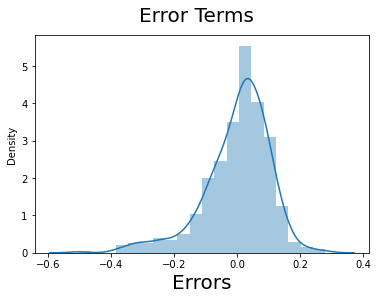

In [97]:
res = y_train - y_train_pred

#plot the Histogram of error
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 20)

###
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

## Step 8: Making Predictions Using the Final Model

 Now that we have fitted the model and checked the assumptions, it's time to go ahead and make 
 predictions using the final model (lr8)

In [98]:
# Apply scaler() to all numeric variables in test dataset.
 # Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp','hum','windspeed','days_old',"cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [99]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
82,0,0,0,0.246330,0.837229,0.456418,0.173126,0.111264,0,1,...,0,0,1,0,0,0,0,0,0,1
272,0,0,0,0.611185,0.672727,0.379497,0.575999,0.372253,0,0,...,1,0,0,1,0,0,0,0,1,0
0,0,0,1,0.323658,0.837229,0.284606,0.066884,-0.001374,1,0,...,0,1,0,0,0,0,0,0,0,1
648,1,0,1,0.442371,0.481385,0.328208,0.861886,0.888736,0,0,...,0,0,0,0,0,0,0,0,1,0
437,1,0,1,0.622076,0.526839,0.191045,0.710008,0.598901,1,0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.515982,0.018265,0.671233,0.516658,0.658588,0.360039,0.498851,0.518478,0.219178,0.255708,...,0.091324,0.173516,0.159817,0.159817,0.132420,0.141553,0.109589,0.041096,0.657534,0.301370
std,0.500889,0.134214,0.470841,0.229885,0.154854,0.161867,0.236772,0.293244,0.414637,0.437258,...,0.288730,0.379560,0.367276,0.367276,0.339723,0.349389,0.313092,0.198967,0.475622,0.459904
min,0.000000,0.000000,0.000000,-0.048868,0.286580,0.074379,-0.049378,-0.001374,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.323113,0.531602,0.240385,0.301159,0.267857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.516432,0.664070,0.335912,0.499698,0.517857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727720,0.766450,0.455779,0.690571,0.775412,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.956434,1.010390,0.864144,0.928287,0.997253,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
# Dividing into X_test and y_test

y_test = df_test.pop("cnt")
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 82 to 674
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   hum                  219 non-null    float64
 5   windspeed            219 non-null    float64
 6   days_old             219 non-null    float64
 7   season_spring        219 non-null    uint8  
 8   season_summer        219 non-null    uint8  
 9   season_winter        219 non-null    uint8  
 10  mnth_aug             219 non-null    uint8  
 11  mnth_dec             219 non-null    uint8  
 12  mnth_feb             219 non-null    uint8  
 13  mnth_jan             219 non-null    uint8  
 14  mnth_jul             219 non-null    uint8  
 15  mnth_jun             219 non-null    ui

In [102]:
#Selecting the variables that were part of final model.
col1=X_train_rfe_8.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 82 to 674
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   yr                   219 non-null    int64  
 2   holiday              219 non-null    int64  
 3   temp                 219 non-null    float64
 4   windspeed            219 non-null    float64
 5   season_spring        219 non-null    uint8  
 6   mnth_oct             219 non-null    uint8  
 7   mnth_sept            219 non-null    uint8  
 8   weathersit_moderate  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [103]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

## Model Evaluation

Text(0, 0.5, 'y_pred')

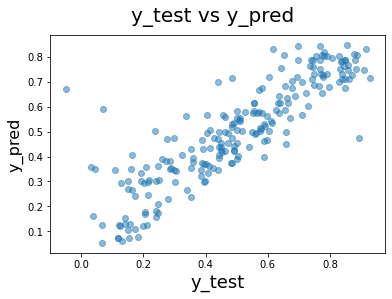

In [104]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

In [105]:
## R^2 Value for the Test data
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7550980002553832

In [106]:
X_test.shape

(219, 8)

In [107]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7457684002651122

## Final Result Comparison
FINAL RESULT COMPARISON: 
- Train R^2 :0.793 - Train Adjusted R^2 :0.790
- Test R^2 :0.755098 - Test Adjusted R^2 :0.74576840 
- This seems to be a really good model that can very well 'Generalize' various datasets.